In this notebook, you'll learn how to use AutoGen to create a financial AI Agent.


* I created two agents: **AssistantAgent** and **UserProxyAgent** (cf below for explanation)

* I first asked to fetch historical prices and plot them for NVIDIA.

* Then, I asked the agents to propose a momentum trading strategy with a Python code implementation, compute it using NVIDIA's historical prices, and save the results as both a plot and a CSV file.


[Hanane D](https://www.linkedin.com/in/hanane-d-algo-trader)

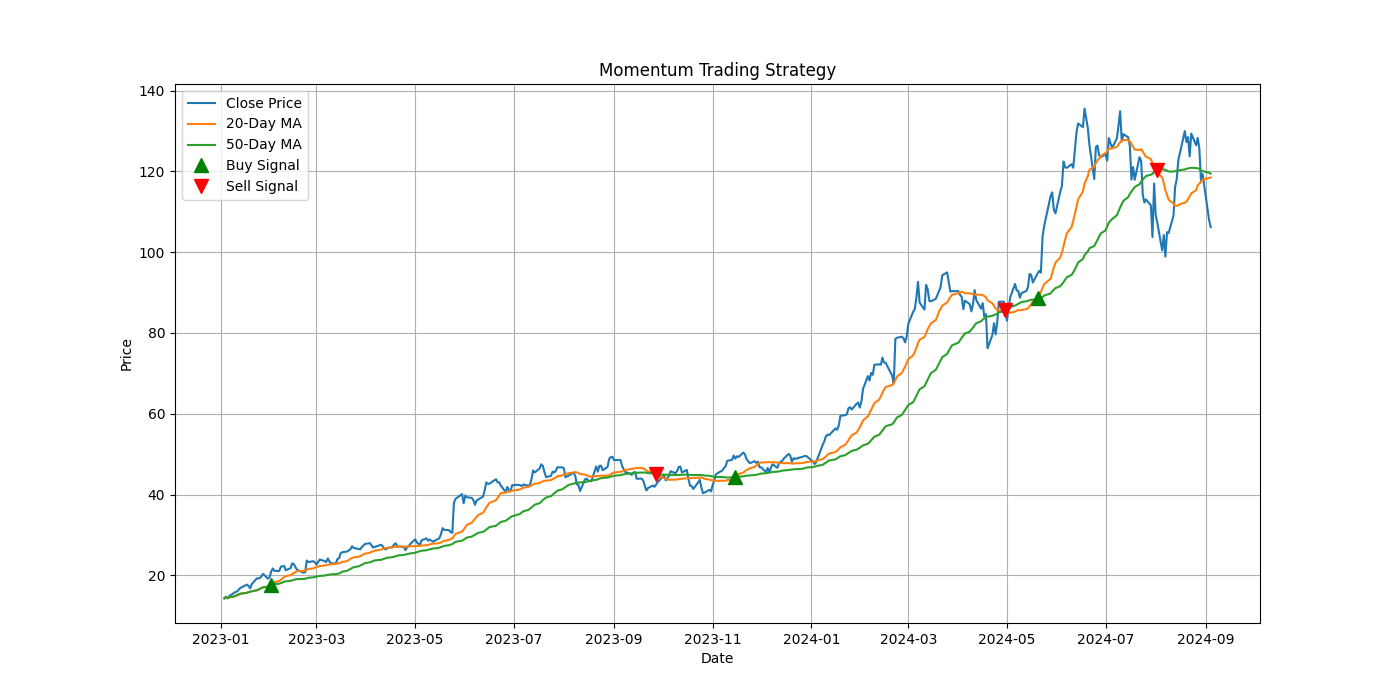

In [70]:
import PIL.Image
image_path='./code/nvidia_trading_strategy.png'
img = PIL.Image.open(image_path)
img

# Install and Import Lib

In [ ]:
!pip install pyautogen -q

In [ ]:
!pip install dask[dataframe] -q

In [6]:
import os
from autogen import AssistantAgent, UserProxyAgent, ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

In [5]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Agents

## Initiate the Command Line Code executor

You'll see a folder created with "code" name.

* I'm using Google Colab. I'm seeing it in the top left menu ==> folders ==> "Code"

In [7]:
code_executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="code",
)

## LLM Config

In [62]:
config_list = [{"model": "gpt-4o", "api_key": OPENAI_API_KEY}]

## AssistantAgent & UserProxyAgent

We will create AssistantAgent and UserProxyAgent:

*   What is the difference between both agents?:



**AssistantAgent**:
* It is behaving like an AI Assistant by using an LLM under the hood.

* It is not requiring human input or code execution.

* It is the standard form of an AI assistant: You give it an instruction like summarize a given text or write a Python code, or refine and correct a given Python code.

* The behavior is instructed by the system message.


**UserProxyAgent**:
It's more sophisticated agent. It can:
* Interact with human input
* Execute Code
* Call functions or tools
* You can either enable or disable the use of an LLM. If disabled the Agent will execute code. If enabled and no code to execute, it will generate answers using the LLM.


✔ ✅ These 2 agents are sublcasses of a more generic class called **ConversableAgent**.

This generic class allows agents to converse with each other through the exchange of the messages while retaining the possibility of human intervention (if asked) to finish the required task.


In [40]:
# config_list = [{"model": "gpt-4o", "api_key": OPENAI_API_KEY}]

# Create an AssistantAgent
assistant = AssistantAgent(name="assistant", llm_config={"config_list": config_list})
# human_input_mode per default: assistant.human_input_mode ==> 'NEVER'

# Create a UserProxyAgent with code execution and no LLM config.
code_executor = UserProxyAgent(name="code_executor", code_execution_config={"executor": code_executor}, llm_config=False)
# human_input_mode per default: code_executor.human_input_mode ==> "ALWAYS" ==> You can modify it to "NEVER"

Here are the description of both agents:

In [13]:
assistant.description

'A helpful and general-purpose AI assistant that has strong language skills, Python skills, and Linux command line skills.'

In [42]:
code_executor.description

'An attentive HUMAN user who can answer questions about the task, and can perform tasks such as running Python code or inputting command line commands at a Linux terminal and reporting back the execution results.'

System message in both agents:

In [28]:
print(assistant.system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [43]:
print(code_executor.system_message) #no system message

In [35]:
## ConversableAgent class : example of how to configure it
# code_executor_agent = ConversableAgent(
#     name="code_executor_agent",
#     llm_config={"config_list": config_list},
#     code_execution_config={"executor": code_executor},
#     human_input_mode="ALWAYS",
#     default_auto_reply=
#     "Please continue. If everything is done, reply 'TERMINATE'.",
# )

# Start chating: Historical Prices

## What is the current price of NVIDIA?

**The Process**

* We initiate the chat using the **code_executor** agent. It will send the first message `"""What date is today? What is the current price of NVIDIA?"""` to the receiver which the **assistant** agent.

* We can also add a parameter max_turns to end the conversation after max_turns discussion between both agents.


1.   The code_executor asked the assistant to answer the question `What date is today? What is the current price of NVIDIA?`
2.   The assistant gives back the answer to the code_executor using the LLM config and proposed a Python code and a name of the file to save the code in.

`Please save the following code in a file and execute it to get the current date and NVIDIA stock price.`

`After you execute this script, it will return the current date and the current price of NVIDIA stock. Please run the provided code and share the result.`

3.   The code_executor: 1/Saved the file in "code" directory  2/ Executed the code 3/Returned the results to the assistant

3.   The assistant review the code_executor answer and as the task was completed succefully, it ended the conversation with "TERMINATE"

`Since all tasks have been completed successfully, this concludes our task.`
`TERMINATE`







In [46]:
chat_result = code_executor.initiate_chat(
    assistant,
    message="""What date is today? What is the current price of NVIDIA?""",
)

code_executor (to assistant):

What date is today? What is the current price of NVIDIA?

--------------------------------------------------------------------------------
assistant (to code_executor):

To answer your questions, we need to follow two steps:
1. Get the current date.
2. Get the current price of NVIDIA stock.

### Step 1: Get the current date.
We can get the current date using Python.

```python
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
print(f"Today's date is: {current_date}")
```

### Step 2: Get the current price of NVIDIA.
To get the current stock price of NVIDIA, we will use a financial API such as Alpha Vantage or Yahoo Finance. Here's an example using the `yfinance` library.

```python
# Install yfinance and pandas via pip:
# !pip install yfinance pandas

import yfinance as yf

# Get NVIDIA stock data
nvidia = yf.Ticker("NVDA")
nvidia_info = nvidia.history(period="1d")

# Extract the latest closing price


In [ ]:
###The generated files:

# ## ***********FILE 1***********
# # Install yfinance and pandas via pip:
# # !pip install yfinance pandas

# import yfinance as yf

# # Get NVIDIA stock data
# nvidia = yf.Ticker("NVDA")
# nvidia_info = nvidia.history(period="1d")

# # Extract the latest closing price
# current_price = nvidia_info['Close'].iloc[-1]
# print(f"Current price of NVIDIA stock is: ${current_price:.2f}")

# ## ***********FILE 2***********
# from datetime import datetime

# # Get the current date
# current_date = datetime.now().strftime("%Y-%m-%d")
# print(f"Today's date is: {current_date}")

# ## ***********FILE 3***********
# # filename: date_and_stock_price.py

# from datetime import datetime
# import yfinance as yf

# # Step 1: Get the current date
# current_date = datetime.now().strftime("%Y-%m-%d")
# print(f"Today's date is: {current_date}")

# # Step 2: Get NVIDIA stock price
# nvidia = yf.Ticker("NVDA")
# nvidia_info = nvidia.history(period="1d")
# current_price = nvidia_info['Close'].iloc[-1]
# print(f"Current price of NVIDIA stock is: ${current_price:.2f}")

In [52]:
chat_result.chat_history

[{'content': 'What date is today? What is the current price of NVIDIA?',
  'role': 'assistant',
  'name': 'code_executor'},
 {'content': 'To answer your questions, we need to follow two steps:\n1. Get the current date.\n2. Get the current price of NVIDIA stock.\n\n### Step 1: Get the current date.\nWe can get the current date using Python.\n\n```python\nfrom datetime import datetime\n\n# Get the current date\ncurrent_date = datetime.now().strftime("%Y-%m-%d")\nprint(f"Today\'s date is: {current_date}")\n```\n\n### Step 2: Get the current price of NVIDIA.\nTo get the current stock price of NVIDIA, we will use a financial API such as Alpha Vantage or Yahoo Finance. Here\'s an example using the `yfinance` library.\n\n```python\n# Install yfinance and pandas via pip:\n# !pip install yfinance pandas\n\nimport yfinance as yf\n\n# Get NVIDIA stock data\nnvidia = yf.Ticker("NVDA")\nnvidia_info = nvidia.history(period="1d")\n\n# Extract the latest closing price\ncurrent_price = nvidia_info[\'Cl

In [53]:
chat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.03834,
  'gpt-4o-2024-05-13': {'cost': 0.03834,
   'prompt_tokens': 4914,
   'completion_tokens': 918,
   'total_tokens': 5832}},
 'usage_excluding_cached_inference': {'total_cost': 0.005155,
  'gpt-4o-2024-05-13': {'cost': 0.005155,
   'prompt_tokens': 1022,
   'completion_tokens': 3,
   'total_tokens': 1025}}}

## Plot the NVIDIA historical price since the beginning of the current year

In [55]:
# the assistant receives a message from the user, which contains the task description
chat_result = code_executor.initiate_chat(
    assistant,
    message="""Plot the NVIDIA historical price since the beginning of the current year and save the figure to a file called 'nvidia_price.png'""",
)

code_executor (to assistant):

Plot the NVIDIA historical price since the beginning of the current year and save the figure to a file called 'nvidia_price.png'

--------------------------------------------------------------------------------
assistant (to code_executor):

To plot the NVIDIA historical price since the beginning of the current year and save the figure to a file, we can use Python with the `yfinance` and `matplotlib` libraries. Here is the plan:

1. Install necessary libraries (`yfinance` and `matplotlib`).
2. Fetch the historical price data for NVIDIA (ticker: "NVDA") since the beginning of the current year using the `yfinance` library.
3. Plot the data using `matplotlib`.
4. Save the resulting plot to a file called 'nvidia_price.png'.

Let's proceed with the code:

```python
# filename: plot_nvidia_price.py

import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Fetch NVIDIA historical price data since beginning of the current year
ticker

In [61]:
# chat_result.chat_history
chat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.08425,
  'gpt-4o-2024-05-13': {'cost': 0.08425,
   'prompt_tokens': 11522,
   'completion_tokens': 1776,
   'total_tokens': 13298}},
 'usage_excluding_cached_inference': {'total_cost': 0.051065,
  'gpt-4o-2024-05-13': {'cost': 0.051065,
   'prompt_tokens': 7630,
   'completion_tokens': 861,
   'total_tokens': 8491}}}

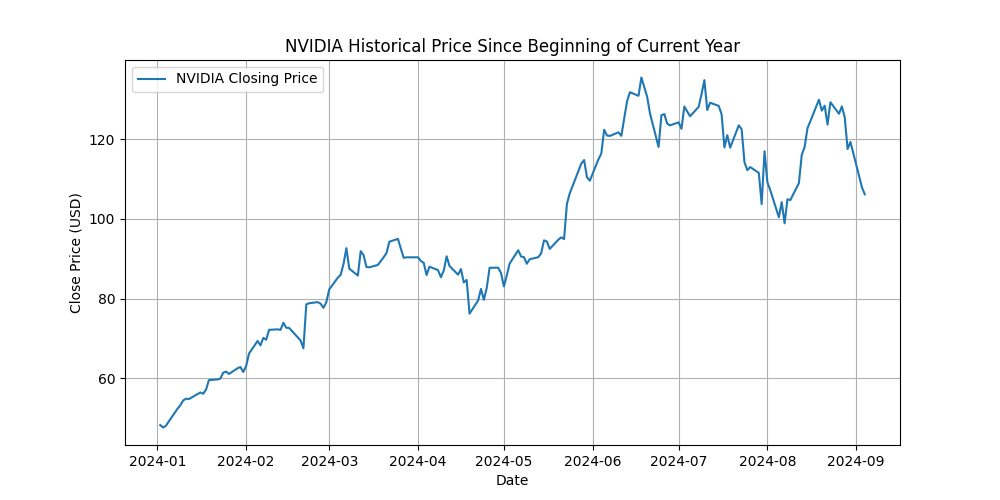

In [58]:
import PIL.Image
# #local image
image_path='./code/nvidia_price.png'
img = PIL.Image.open(image_path)
img

You can modify LLM config to lower your cost:

In [65]:
# config_list = [{"model": "gpt-4o-mini", "api_key": OPENAI_API_KEY}]
# assistant_4o_mini = AssistantAgent(name="assistant", llm_config={"config_list": config_list})

# # You can modify code_executor.human_input_mode to "NEVER"

# Start Chating: Momentum Trading Strategy

## Propose a Momentum Trading Strategy and Plot it for NVIDIA

In [66]:
chat_result = code_executor.initiate_chat(
    assistant,
    message="""Let's proceed step by step:
    1- Propose a Python code implementation of one momentum trading strategy
    2- Save in a file called 'momentum_trading_strategy.py'
    2- Apply this code to NVIDIA historical price of the current year.
    4- Save the results in a csv file called 'nvidia_trading_strategy.csv'
    5- Plot this trading strategy and save it in a file called 'nvidia_trading_strategy.png'""",
)

code_executor (to assistant):

Let's proceed step by step:
    1- Propose a Python code implementation of one momentum trading strategy
    2- Save in a file called 'momentum_trading_strategy.py'
    2- Apply this code to NVIDIA historical price of the current year.
    4- Save the results in a csv file called 'nvidia_trading_strategy.csv'
    5- Plot this trading strategy and save it in a file called 'nvidia_trading_strategy.png'

--------------------------------------------------------------------------------
assistant (to code_executor):

Sure, let's proceed step-by-step as you requested.

### Step 1: Implement a Momentum Trading Strategy
A simple momentum trading strategy could be based on comparing the short-term moving average (e.g., 20 days) with a long-term moving average (e.g., 50 days). When the short-term moving average crosses above the long-term moving average, it signals a buy. Conversely, when the short-term moving average crosses below the long-term moving average, it s

In the "code" directory, you will see the new files generated:
* momentum_trading_strategy.py
* nvidia_trading_strategy.csv
* nvidia_trading_strategy.png

In [69]:
chat_result.cost

{'usage_including_cached_inference': {'total_cost': 0.136815,
  'gpt-4o-2024-05-13': {'cost': 0.136815,
   'prompt_tokens': 16533,
   'completion_tokens': 3610,
   'total_tokens': 20143}},
 'usage_excluding_cached_inference': {'total_cost': 0.10363,
  'gpt-4o-2024-05-13': {'cost': 0.10363,
   'prompt_tokens': 12641,
   'completion_tokens': 2695,
   'total_tokens': 15336}}}

## Plot Momentum Trading Strategy

Let's have a look on the plot generated about the trading strategy applied to NVIDIA:

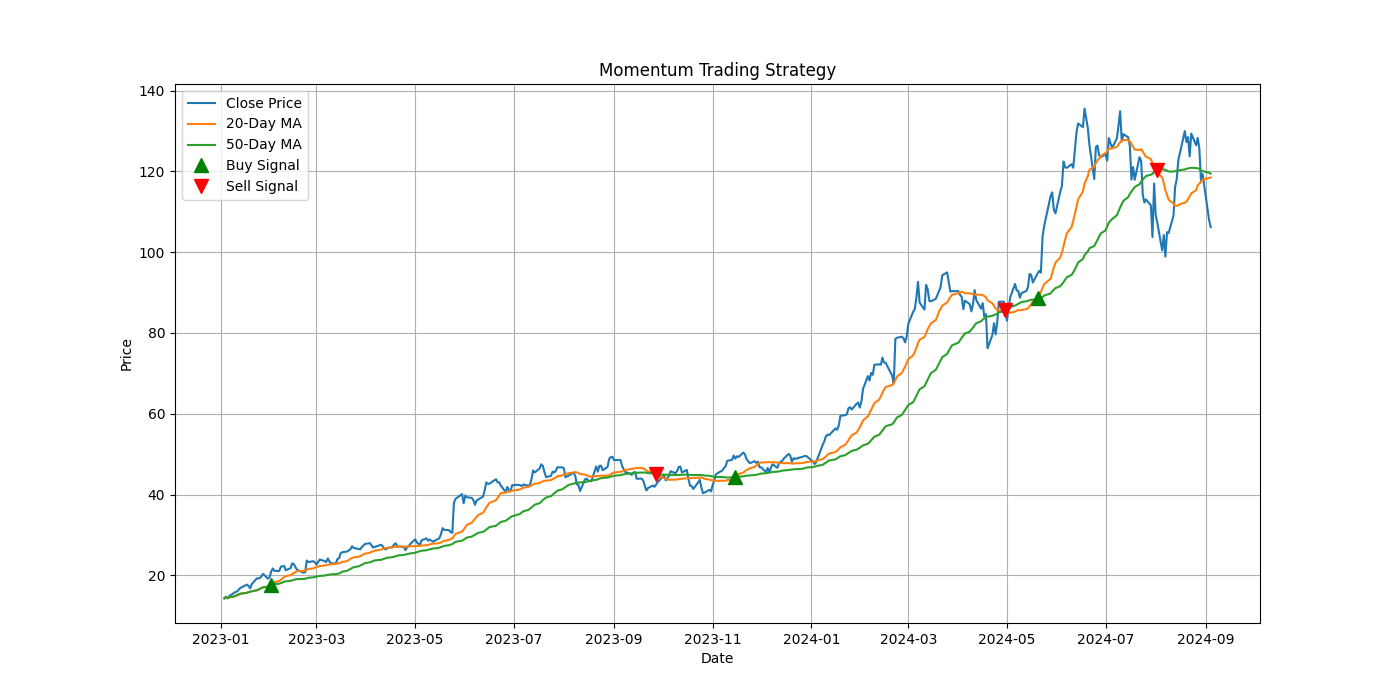

In [67]:
import PIL.Image
# #local image
image_path='./code/nvidia_trading_strategy.png'
img = PIL.Image.open(image_path)
img

## Visualize Momentum Trading Strategy DataFrame

Let's have a look on a CSV file in which we have the results of the trading strategy alongside the historical prices of NVIDIA

In [68]:
import pandas as pd
file_path='./code/nvidia_trading_strategy.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position
0,2023-01-03,14.851,14.996,14.096,14.315,14.306805,401277000,14.3150,14.3150,0,NaN
1,2023-01-04,14.567,14.853,14.241,14.749,14.740557,431324000,14.5320,14.5320,0,0.0
2,2023-01-05,14.491,14.564,14.148,14.265,14.256834,389168000,14.4430,14.4430,0,0.0
3,2023-01-06,14.474,15.010,14.034,14.859,14.850493,405044000,14.5470,14.5470,0,0.0
4,2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000,14.7632,14.7632,0,0.0
